Import necessary library



In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary column

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename column title

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country',inplace=True)
df_can.columns = list(map(str,df_can.columns))
Tahun = list(map(str,range(1980, 2014)))

**Question 1**:Let's compare the number of immigrants from India and China from 1980 to 2013.

Step 1: Get the data set for China and India, and display dataframe.

In [6]:
df_can.drop(['Continent', 'Region', 'DevName'], axis=1, inplace=True)

In [7]:
Newdf= df_can.loc[['India', 'China'] ,Tahun]
Newdf=Newdf.transpose()
Newdf

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`

In [8]:
import matplotlib.pyplot as plt

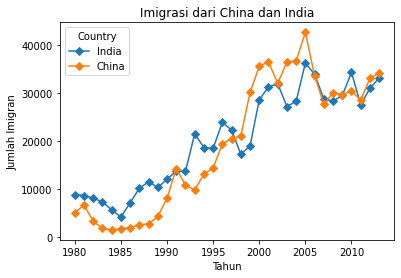

In [9]:
Newdf.index = Newdf.index.map(int)
Newdf.plot(kind='line', marker= 'D')
plt.title('Imigrasi dari China dan India')
plt.ylabel('Jumlah Imigran')
plt.xlabel('Tahun')
plt.show()

**Question 2**: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 4 countries

In [10]:
df=df_can.sort_values('Total',ascending=False)
df=df.head()
df_top5=df[Tahun].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

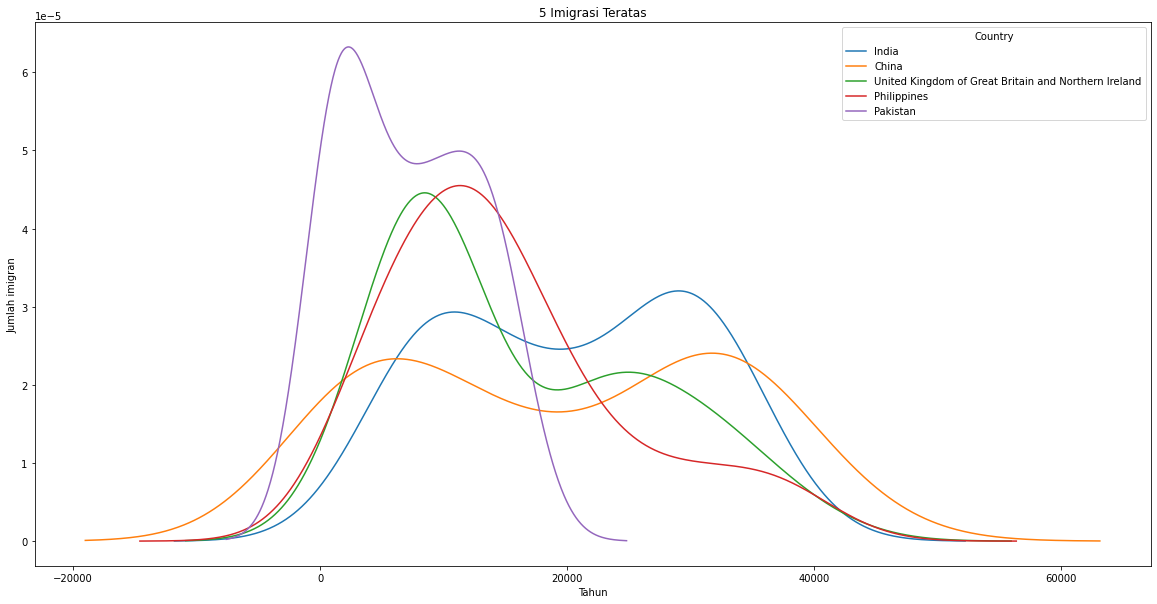

In [11]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'density',stacked=False, figsize = (20,10),
            )
plt.title('5 Imigrasi Teratas')
plt.ylabel('Jumlah imigran')
plt.xlabel('Tahun')
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [12]:
df_baru=df_can.sort_values('Total',ascending=True)
df_least5=df_baru.head()
df_least5=df_least5[Tahun].transpose()
df_least5.head()

Country,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia
1980,0,0,0,1,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


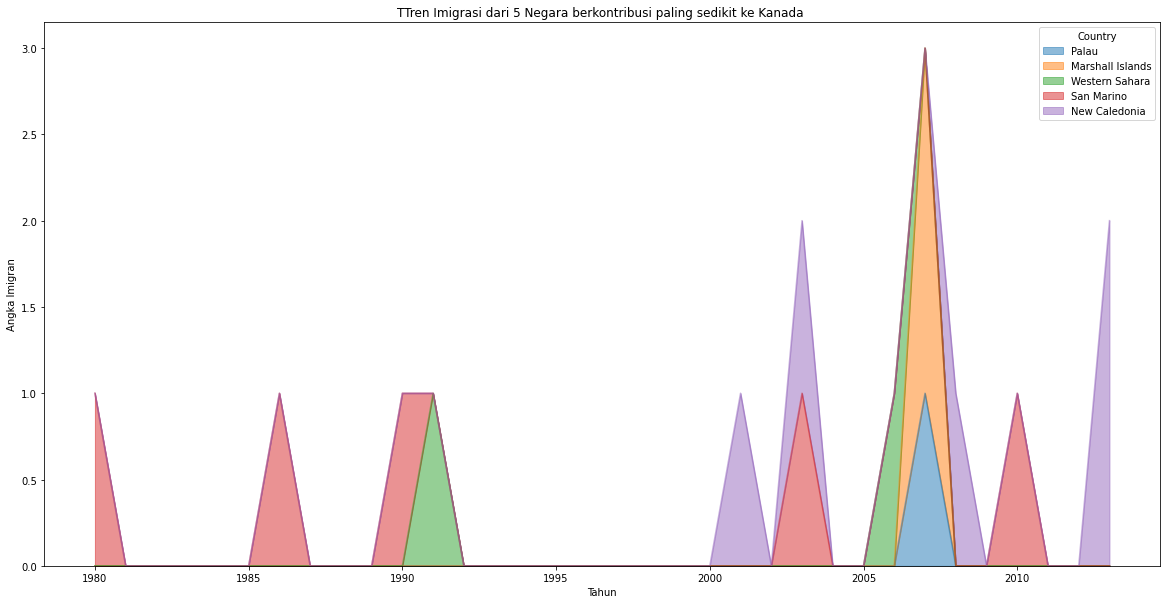

In [13]:
df_least5.index = df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.5, stacked=True, figsize=(20, 10),)

plt.title('TTren Imigrasi dari 5 Negara berkontribusi paling sedikit ke Kanada ')
plt.ylabel('Angka Imigran')
plt.xlabel('Tahun')

plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

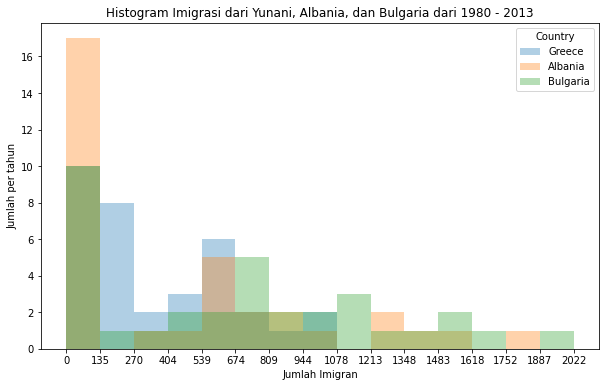

In [14]:
df_new = df_can.loc[['Greece', 'Albania', 'Bulgaria'], Tahun]
df_new = df_new.transpose()
count, bin_edges = np.histogram(df_new, 15)
df_new.plot(kind ='hist',figsize=(10, 6),bins=15,alpha=0.35,xticks=bin_edges)
plt.title('Histogram Imigrasi dari Yunani, Albania, dan Bulgaria dari 1980 - 2013')
plt.ylabel('Jumlah per tahun')
plt.xlabel('Jumlah Imigran')
plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [15]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Step 2: Plot data:
       1. Use `kind='barh'` to generate a bar chart with horizontal bars.
       2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
       3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

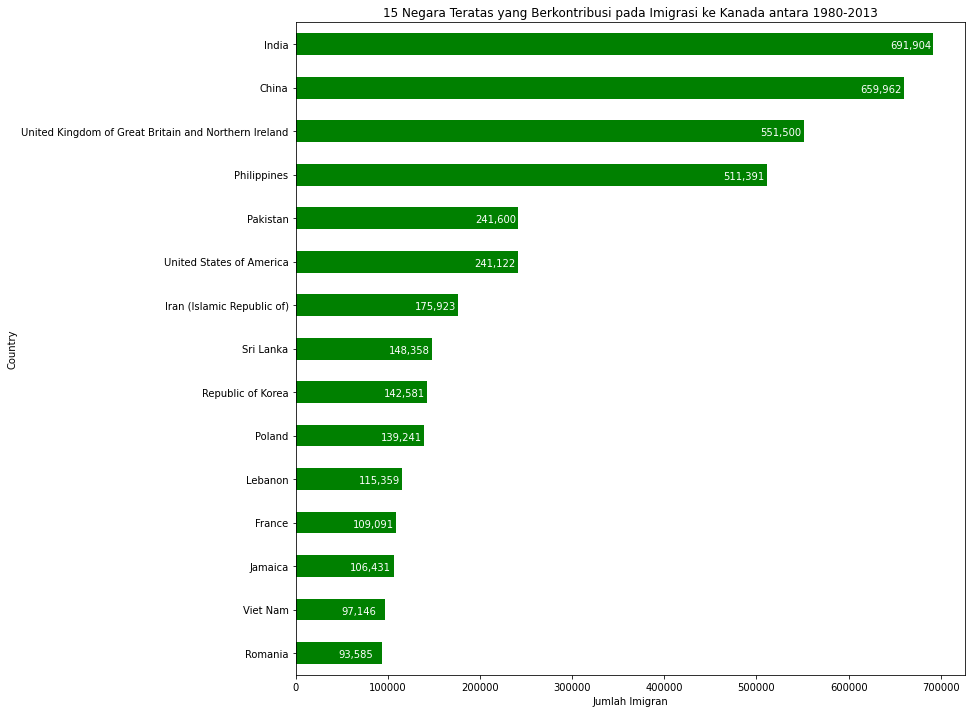

In [16]:
df_top15.plot(kind='barh', figsize=(12, 12), color='green')
plt.xlabel('Jumlah Imigran')
plt.title('15 Negara Teratas yang Berkontribusi pada Imigrasi ke Kanada antara 1980-2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()  

**Thank you for completing this lab!**